# Tugas Kecil 2
### Eksplorasi Scikit-Learn pada Jupyter Notebook

Dion Saputra 1351645 <br>
Rabbi Fijar Mayoza 13516081

Import necessary library

In [43]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn import tree
from subprocess import call
from IPython.display import Image

Define helper function

In [53]:
def show_model_visualization(target,hypotesis):
    visualise_df = pd.DataFrame({'target': target,'hypotesis': hypotesis})
    lines = visualise_df.plot.line()

# show correct prediction percentage
def show_prediction_percentage(feature,label,prediction):
    print("Number of correct prediction from %d data is: %d" 
      %(feature.shape[0], (label == y_predict).sum()))

### A. Load Dataset 

#### A.1 Load Dataset Iris 

In [5]:
def load_dataset_iris():
    # load iris dataset from standar scikit dataset
    return datasets.load_iris()

def build_dataframe_iris(iris):
    # save feature values in pandas dataframe
    iris_feature_df = pd.DataFrame(iris.data)
    iris_feature_df.columns = iris.feature_names

    # save label values in pandas dataframe
    iris_target_df = pd.DataFrame(iris.target);
    iris_target_df.columns = ['target']
    map_target = pd.Series(iris.target_names, index=[0,1,2]);
    iris_target_df['target'] = iris_target_df['target'].map(map_target)

    # concat feature dataframe and label dataframe
    iris_df = pd.concat([iris_feature_df, iris_target_df], axis=1)
    
    return iris_df

# load dataset iris
iris = load_dataset_iris()

# show dataframe iris
iris_df = build_dataframe_iris(iris)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### A.2 Load Dataset Play-Tennis 

In [22]:
# load play-tennis dataset from external csv using pandas
def build_dataframe_tennis(tennis_file):
    tennis_df = pd.read_csv(tennis_file);
    return tennis_df

# show tennis dataframe
tennis_file = "weather.nominal.csv"
tennis_df = build_dataframe_tennis(tennis_file)
tennis_df

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


### B. Full-Train Learning
<b>Full-train learning</b> merupakan metode learning dengan menggunakan keseluruhan data pada dataset sebagai data training. Begitu juga dengan data test

#### B.1. Naive Bayes
<b>Naive Bayes</b> merupakan metode untuk <i>supervised learning</i> dengan memanfaatkan <i>Teorema Bayes</i>. Disebut <i>Naive</i> karena pada implementasinya menggunakan <i>naive assumption</i> bahwa antar-feature pada dataset independen.

Pada scikit-learn terdapat 3 jenis algoritma naive bayes, yaitu:
<ol>
    <li><i>Gaussian Naive Bayes (GaussianNB)</i></li>
    <li><i>Multinomial Naive Bayes (MultinomialNB)</i></li>
    <li><i>Complement Naive Bayes (ComplementNB)</i></li>
<ol>

#### B.1.a Gaussian Naive Bayes (GaussianNB) 

In [55]:
# gaussian naive bayes model for iris data
gnb_iris_model = GaussianNB().fit(iris.data,iris.target)
y_predict = gnb_iris_model.predict(iris.data)

show_prediction_percentage(iris.data,iris.target,y_predict)

Number of correct prediction from 150 data is: 144


#### B.1.b Multinomial Naive Bayes (MultinomialNB) 

In [58]:
# multinomial naive bayes model for iris data
mnb_iris_model = MultinomialNB().fit(iris.data,iris.target)
y_predict = mnb_iris_model.predict(iris.data)

show_prediction_percentage(iris.data,iris.target,y_predict)

Number of correct prediction from 150 data is: 143


#### B.1.c Complement Naive Bayes (ComplementNB)

In [60]:
# complement naive bayes model for iris data
cnb_iris_model = ComplementNB().fit(iris.data,iris.target)
y_predict = cnb_iris_model.predict(iris.data)

show_prediction_percentage(iris.data,iris.target,y_predict)

Number of correct prediction from 150 data is: 100


#### B.2 Decision Trees ID3

Decision Trees merupakan sebuah teknik dalam supervised learning yang memanfaatkan representasi tree untuk memprediksi instance baru dengan membandingkan value dari attribute instance terhadap node-node yang ada pada model tree. Salah satu algoritma yang digunakan untuk membangun model decision tree adalah ID3 (Iterative Dichotomiser 3).

In [68]:
# decision trees id3 model for iris data
dt_id3_iris_model = tree.DecisionTreeClassifier(criterion="entropy").fit(iris.data,iris.target)
y_predict = dt_id3_iris_model.predict(iris.data)

show_prediction_percentage(iris.data,iris.target,y_predict)

Number of correct prediction from 150 data is: 150


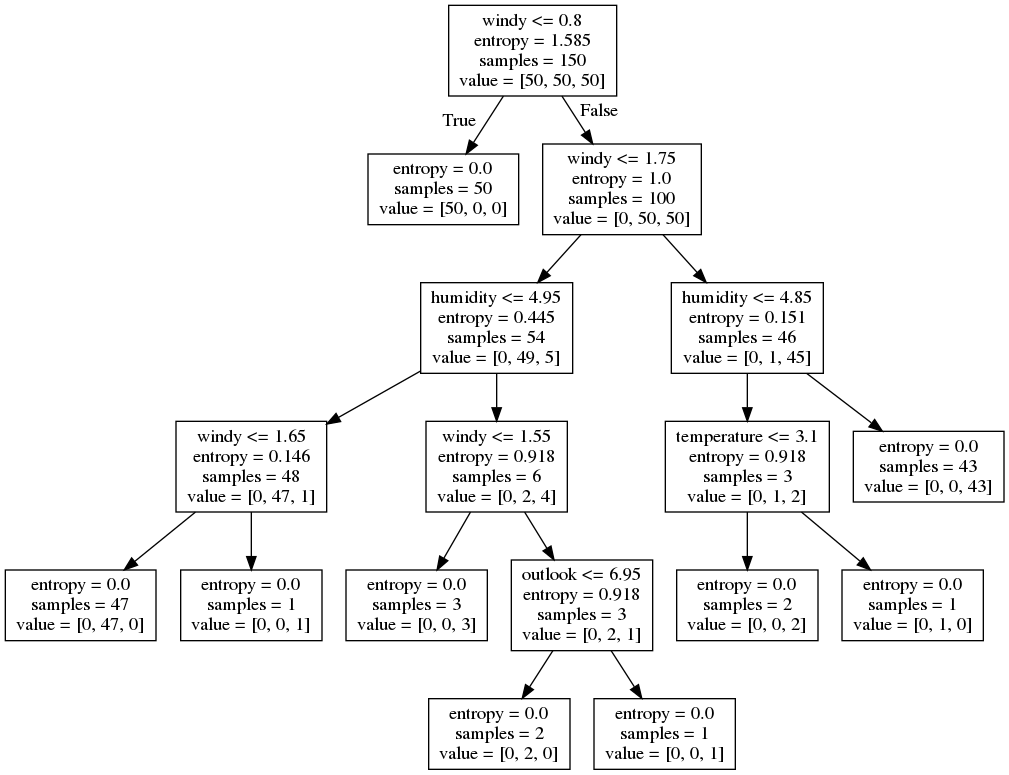

In [69]:
tree.export_graphviz(dt_id3_iris_model, out_file='dt_id3_iris_model.dot', feature_names=feature.columns)
call(['dot', '-T', 'png', 'dt_id3_iris_model.dot', '-o', 'dt_id3_iris_model.png'])
Image("dt_id3_iris_model.png")

#### B.3 K-Nearest Neighboard (KNN)

KNN merupakan teknik yang digunakan untuk mengklasifikasikan instance baru dengan membandingkan instance tersebut dengan <i>k</i> tetangga terdekatnya.